# Report: Final Project (Machine Learning)

## 1. Introduction

- In this report, I will present the process of training a classification machine learning model on the provided dataset, aiming to achieve the highest possible performance based on some evaluation metrics.

## 2. Import datasets and necessary libraries

In [13]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [14]:
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Malware_subset.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,43399,443,6,36586,1,1,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO
1,40422,443,6,36984,1,1,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO
2,56977,80,6,15638963,5,5,405.0,448.0,405.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO
3,60652,80,6,15660249,5,5,405.0,448.0,405.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO
4,44512,80,6,14456391,5,3,268.0,519.0,268.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_FEIWO


## 3. Data preprocessing

### **Data Exploration**

In [15]:
# Handle missing data
print(f"Number of missing data: {df.isnull().any().sum()}")

# Drop all NaN and infinite numbers
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(f"NaN and infinite numbers: {df.isnull().sum().sum()}")

# Drop all duplicates
df = df.drop_duplicates()
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of missing data: 0
NaN and infinite numbers: 0
Number of duplicates: 0


#### Filtering catergorical and numerical columns

In [16]:
cat_col = [col for col in df.columns if df[col].dtype=='object']
num_col = [col for col in df.columns if df[col].dtype!='object']

print(f'Number of categorical columns: {len(cat_col)}')
print(f'Catergorial columns: {cat_col}')
print(f'Number of numerical columns: {len(num_col)}')
print(f'Numerical columns: {num_col}')

Number of categorical columns: 1
Catergorial columns: ['Label']
Number of numerical columns: 80
Numerical columns: [' Source Port', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet L

### **Data Distribution Visualization**

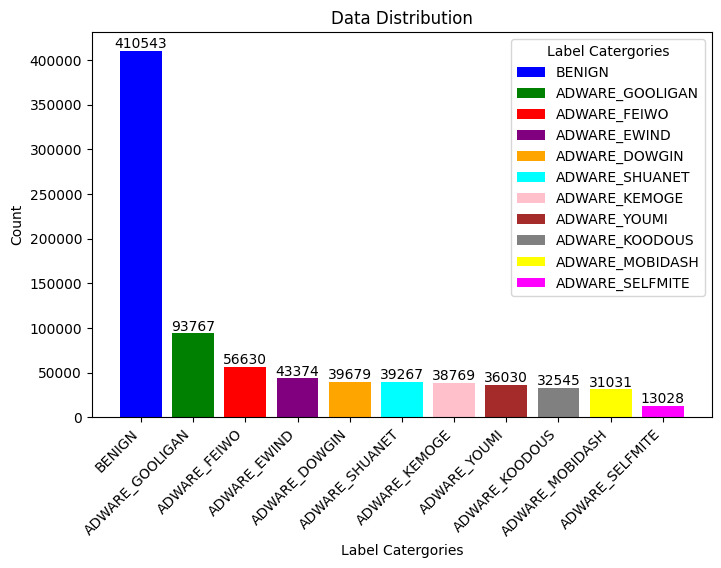

In [17]:
# Set the width and height size
plt.figure(figsize=(8,5))

# Get labels and values of column 'Label'
labels = df['Label'].value_counts().index.to_numpy()
values = df['Label'].value_counts().values

# Create colors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'pink', 'brown', 'gray', 'yellow', 'magenta']

# Create bars
bars = plt.bar(labels, values, align='center',label=labels, color=colors)

# Title & labels
plt.title('Data Distribution')
plt.xlabel('Label Catergories')
plt.ylabel('Count')
plt.legend(title='Label Catergories')
plt.xticks(np.arange(0, 11, 1))
plt.xticks(rotation=45, ha='right')  # Rotate labels neatly

# Add value labels on top of bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
             ha='center', va='bottom', fontsize=10)

plt.show()

- Through above bar chart, we can assume that this is the imbalanced dataset.

In [18]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['Label'])

df['Label'] = encoder.fit_transform(df['Label'])

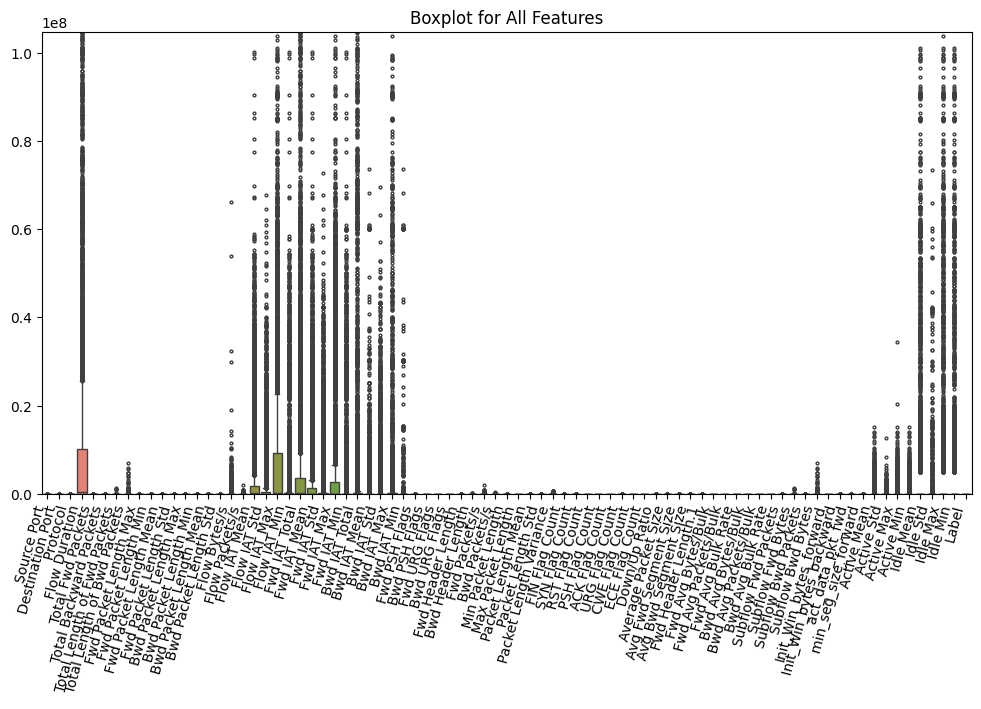

In [19]:
plt.figure(figsize=(12, 6))

# Create shuffle data_frame with 10000 rows
rng_df = df.sample(frac=1, random_state=42).reset_index(drop=True)[:10000]

sns.boxplot(data=rng_df, flierprops={'markersize': 2})

plt.xticks(rotation=75, ha='right')
plt.title("Boxplot for All Features")
plt.ylim(0, df.iloc[:, :-1].quantile(0.99).max())

plt.show()

In [20]:
# Using IQR to filter outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Before: {df.shape}")
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print(f"After: {df.shape}")
df

Before: (834663, 81)
After: (15075, 81)


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
73,50866,80,6,356225,3,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
218,60057,80,6,85043,3,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
271,57416,80,6,40365,3,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
334,60189,80,6,424181,1,1,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
697,40316,80,6,274110,3,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834197,59340,443,6,270084,1,1,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
834285,57677,443,6,21225,1,1,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
834331,51906,443,6,43453,3,0,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
834630,48908,443,6,35790,1,1,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10


In [21]:
# Drop all data that contain full values of -1 or 0
df = df.loc[:, ~((df == 0) | (df == -1)).all(axis=0)]

In [22]:
# Split the features and labels
X = df.drop('Label', axis=1)
y = df["Label"]


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [25]:
from sklearn.linear_model import Lasso

from sklearn.feature_selection import VarianceThreshold

# Choose important features
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
selected_features = X.columns[np.abs(lasso.coef_) > 0]
X = X[selected_features]

# Remove unimportant features
selector = VarianceThreshold(threshold=0.01)
X = selector.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [28]:
from sklearn.ensemble import RandomForestClassifier

# # Use Random Forest Model
def RandomForestModel(n_estimators=100):
  rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
  rf.fit(X_train, y_train)
  # Make predictions
  return rf.predict(X_test)

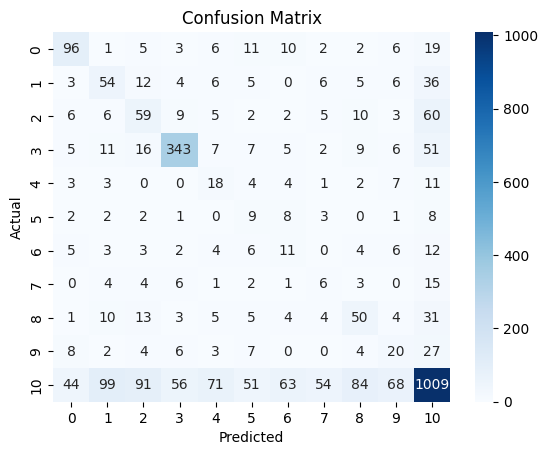

0.5895424936081448


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_pred = RandomForestModel(200)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
f1 = f1_score(y_test, y_pred, average='weighted')
print(f1)